In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import numpy as np
import os

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
station_list=[]
for i in os.listdir("./station_list"):
    station_list.append(i)

In [4]:
def read_csv_only_one(station_name, year, month):
    if year != '2020':
        df1 = pd.read_csv(f'station_list/{station_name}/{year}/{station_name}_{year}_{month}.csv')
    else:
        df1 = pd.read_csv(f'station_list/{station_name}/{year}/{station_name}_2020_1.csv')
    return df1

In [5]:
def make_pm_list(df, pm_size):
    # pm size에 따라서 pm10 또는 pm2.5 return
    
    if pm_size == 10: # pm10
        # pm10['날짜']['시간']
        pm10 = [[0 for _ in range(25)] for _ in range(32)]
        for time in range(1,25): # 1 ~ 24로 index를 조정하기 위함
            temp=[0,]
            for i in range(len(df)):
                if i%24 == time-1: # 특정 시 추출
                    temp.append(df.loc[i]['pm10'])
            for j in range(1, 25):
                pm10[j][time] = temp[j]
        return pm10
    
    elif pm_size == 2.5: # pm2.5
        pm25 = [[0 for _ in range(25)] for _ in range(32)]
        for time in range(1,25): # 1 ~ 24로 index를 조정하기 위함
            temp=[0,]
            for i in range(len(df)):
                if i%24 == time-1: # 특정 시 추출
                    temp.append(df.loc[i]['pm2.5'])
            for j in range(1, 25):
                pm25[j][time] = temp[j]
        return pm25
    
    else:
        print("check pm size !!!")

In [6]:
# 'DataFrame'과 '측정하고 싶은 시간', 'pm size'를 입력하면
# 그 시간대의 리스트를 반환한다.

def make_si_list(df, si, pm_size):
    # pm size에 따라 분류
    if pm_size == 10:
        pm10 = make_pm_list(df, 10) # pm list를 만들어줌
        pm10 = np.array(pm10) # 2차원 배열 slicing을 위해 numpy array로 만들어줌
        si_list = pm10[1:,si:(si+1)].T.tolist()[0] # 그냥 복잡한 자동화 작업
        return si_list
    elif pm_size == 2.5:
        pm25 = make_pm_list(df, 10)
        pm25 = np.array(pm25)
        si_list = pm25[1:,si:(si+1)].T.tolist()[0]
        return si_list
    else:
        print("check pm size !!!")

In [7]:
df1 = read_csv_only_one('Yongsan_Hangandaero','2019','1')
df2 = read_csv_only_one('Yongsan_Hannamdaero','2019','1')

In [12]:
df1

,time,pm10,pm2.5
0,2019-01-01:01,41.0,24.0
1,2019-01-01:02,42.0,31.0
2,2019-01-01:03,43.0,29.0
3,2019-01-01:04,46.0,33.0
4,2019-01-01:05,48.0,37.0
5,2019-01-01:06,45.0,33.0
6,2019-01-01:07,44.0,30.0
7,2019-01-01:08,30.0,21.0
8,2019-01-01:09,33.0,27.0
9,2019-01-01:10,32.0,22.0


In [8]:
# 한강대로, 4시, pm10
hangandaero_foursi = make_si_list(df1, 4, 10)

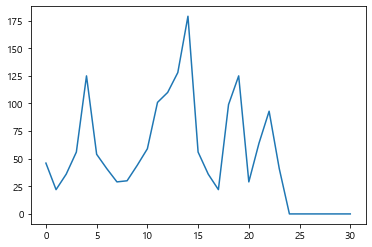

In [10]:
plt.plot(hangandaero_foursi)